In [2]:
import pandas as pd 

network_data= pd.read_csv("Networking-Info-csv-txt.csv")
network_data.head()

,ID,SENDER,RECEIVER,FROM,LAT_LON_1,TO,LAT_LON_2,KEYWORDS 1,KEYWORDS 2,KEYWORDS 3,KEYWORDS 4,KEYWORDS 5,KEYWORDS 6,DATE,TYPE
0,1,King William,Lord Melville,Hampton Court,"51.403332, -0.337500",London,"51.50673486004276, -0.12083646321188168",war,castles,invasion,religion,NaN,NaN,3/7/1689,Instructions
1,2,King William,Convention,Hampton Court,"51.403332, -0.337500",London,"51.50673486004276, -0.12083646321188168",war,Scotland,Presbyterian,safety,NaN,NaN,3/7/1689,Instructions
2,3,Sir James Dalrymple of Stair,Lord Melville,London,"51.50673486004276, -0.12083646321188168",London,"51.50673486004276, -0.12083646321188168",money,Ireland,invasion,Convention,Scotland,NaN,3/23/1689,Letter
3,4,Sir James Dalrymple of Stair,Lord Melville,London,"51.50673486004276, -0.12083646321188168",London,"51.50673486004276, -0.12083646321188168",Ireland,invasion,Scotland,Derry,Church,NaN,3/27/1689,Letter
4,5,Sir James Dalrymple of Stair,Lord Melville,London,"51.50673486004276, -0.12083646321188168",London,"51.50673486004276, -0.12083646321188168",danger,settlement,Scotland,Ross,NaN,NaN,3/30/1689,Letter


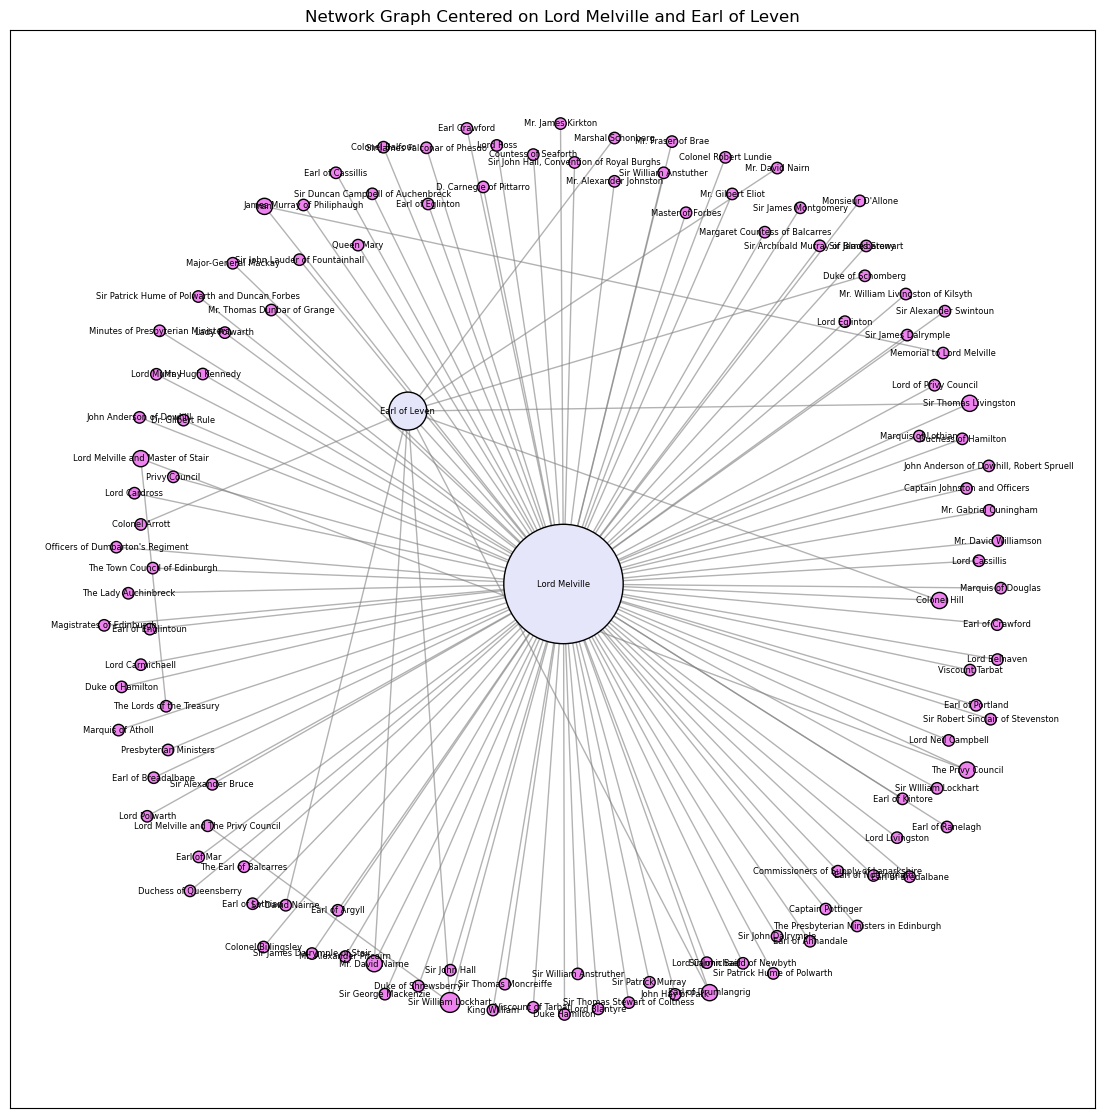

In [56]:
import networkx as nx 
import matplotlib.pyplot as plt

melville_leven_nodes= network_data[(network_data['SENDER'].str.contains("Lord Melville|Earl of Leven")) | 
    (network_data['RECEIVER'].str.contains("Lord Melville|Earl of Leven"))]

G= nx.Graph()

for _, row in melville_leven_nodes.iterrows():
    sender = row['SENDER']
    receiver = row['RECEIVER']
    G.add_edge(sender, receiver)

centrality = nx.degree_centrality(G)
node_sizes = [centrality[node] * 8000 for node in G.nodes()]

node_colors = ["lavender" if node in ["Lord Melville", "Earl of Leven"] else "violet" for node in G.nodes()]

positions = nx.spring_layout(G, k=1.5, center=[0.5, 0.5])


plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G, positions, node_size=node_sizes, node_color=node_colors, edgecolors="black")
nx.draw_networkx_edges(G, positions, width=1, edge_color="grey", alpha=0.6)
nx.draw_networkx_labels(G, positions, font_size=6,font_color="black",verticalalignment='center', horizontalalignment='center')

plt.title("Network Graph Centered on Lord Melville and Earl of Leven")
plt.show()